In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
figsize=8

In [3]:
def trajectoire(A, interval, c_i):
    def xdot(t, x):
        return A @ x

    sol = solve_ivp(xdot, interval, c_i, t_eval=np.linspace(interval[0], interval[1], 250))
    plt.plot(sol.y[0, :], sol.y[1, :], color='red', label=f"Trajectoire (x(0) = {c_i})")
    
def vecteurs_propres(A):
    L, V = np.linalg.eig(A)
    line_range = np.linspace(-1.5, 1.5, 100)
    V = np.real(V)
    if V[0, 0] != 0:
        eigenvector_1 = (V[1,0] / V[0, 0]) * line_range
        plt.plot(line_range, eigenvector_1, color="green", label='Droite invariante')
    if V[0, 1] != 0:
        eigenvector_2 = (V[1,1] / V[0, 1]) * line_range
        plt.plot(line_range, eigenvector_2, color="green", label='Droite invariante')
    if V[0, 0] != 0 and V[0, 1] != 0:
        plt.quiver([0, 0], [0, 0], V[0, :], V[1, :], scale=10, width=0.005, color='darkgreen', label="Vecteurs propres")

def isoclines(A):
    line_range = np.linspace(-1.5, 1.5, 100)
    if A[0, 1] != 0:
        isocline_1 = -(A[0, 0] / A[0, 1]) * line_range
        plt.plot(line_range, isocline_1, color='blue', label='Isocline')
    else:
        plt.vlines(x=0, ymin=-2, ymax=2, color='blue', label='Isocline')
    if A[1, 1] != 0:
        isocline_2 = -(A[1, 0] / A[1, 1]) * line_range
        plt.plot(line_range, isocline_2, color='blue', label='Isocline')

def vecteurs_vitesse(A):
    x1, x2 = np.meshgrid(np.arange(-1.5, 1.6, 0.2), np.arange(-1.5, 1.6, 0.2))
    
    x1_values = A[0,0]*x1 + A[0,1]*x2
    x2_values = A[1,0]*x1 + A[1,1]*x2
    
    norms = np.sqrt(x1_values**2 + x2_values**2)
    x1_normalized = x1_values / norms
    x2_normalized = x2_values / norms
    
    vector_scale = 30
    plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale)

def vecteurs_flux(A):
    x1, x2 = np.meshgrid(np.arange(-1.5, 1.6, 0.1), np.arange(-1.5, 1.6, 0.1))
    
    x1_values = A[0,0]*x1 + A[0,1]*x2
    x2_values = A[1,0]*x1 + A[1,1]*x2
    
    plt.streamplot(x1, x2, x1_values, x2_values, density=0.4, linewidth=0.2, color="black")

def portrait_de_phase(A):
    plt.figure(figsize=(figsize, figsize))
    vecteurs_flux(A)
    vecteurs_propres(A)
    isoclines(A)
    vecteurs_vitesse(A)
    trajectoire(A, [0, 1], [0.5, 0.5])
    trajectoire(A, [0, 1], [-0.5, 0.5])
    trajectoire(A, [0, 1], [0.5, -0.5])
    trajectoire(A, [0, 1], [-0.5, -0.5])
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), fancybox=True)
    #

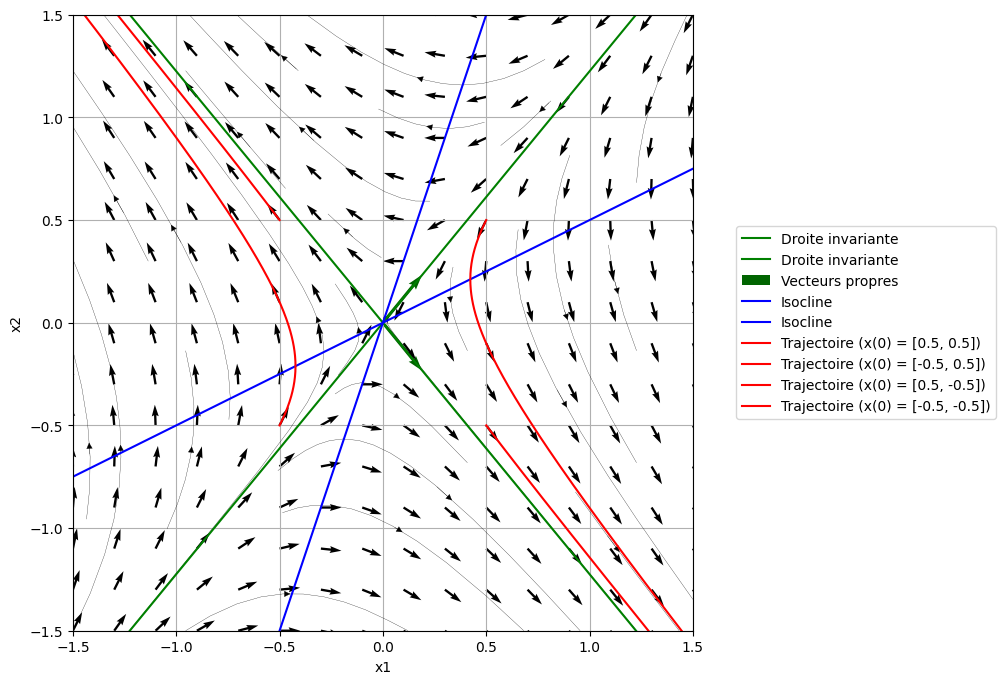

In [4]:
portrait_de_phase(np.array([[1, -2], [-3, 1]]))
plt.savefig("exemple_portrait_de_phases.jpg", dpi=200, bbox_inches='tight')
plt.show()

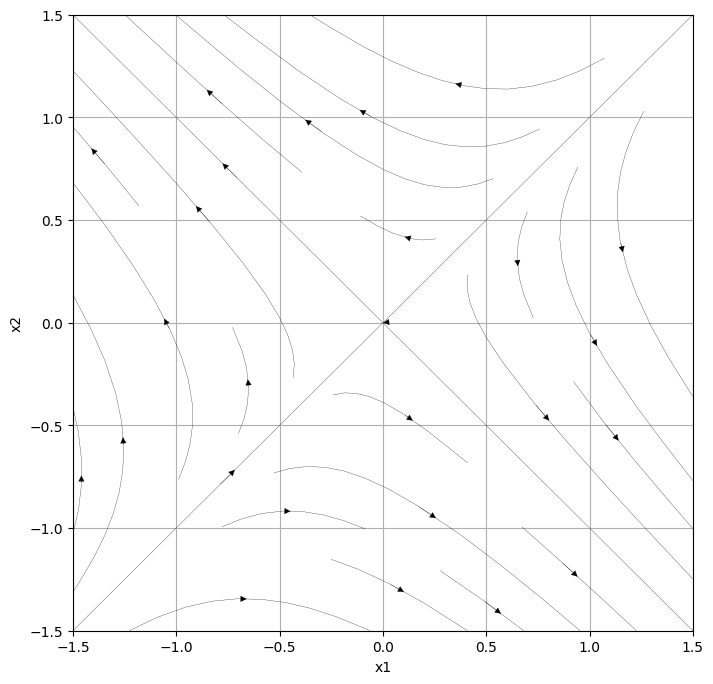

In [5]:
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(np.array([[1, -2], [-2, 1]]))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

plt.savefig("vecteurs_flux.jpg", dpi=200, bbox_inches='tight')
plt.show()

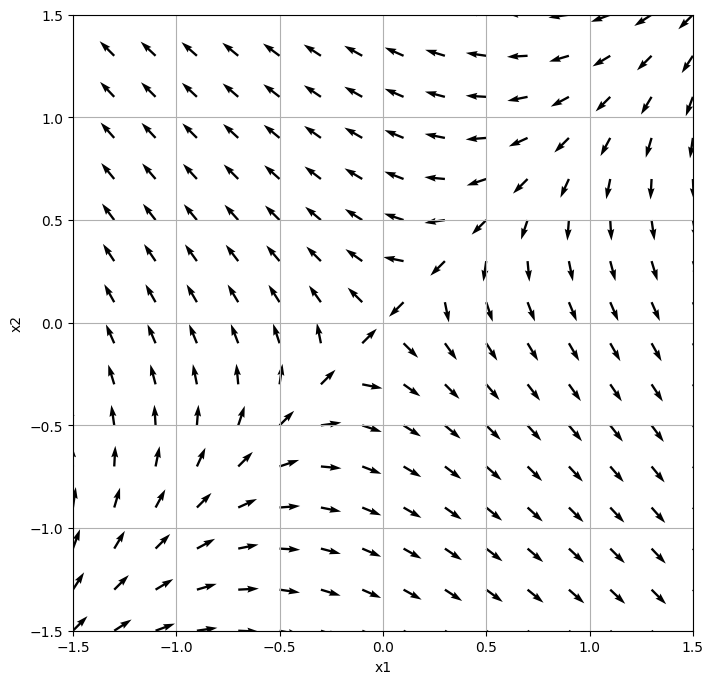

In [6]:
plt.figure(figsize=(figsize, figsize))
vecteurs_vitesse(np.array([[1, -2], [-2, 1]]))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

plt.savefig("vecteurs_vitesse.jpg", dpi=200, bbox_inches='tight')
plt.show()

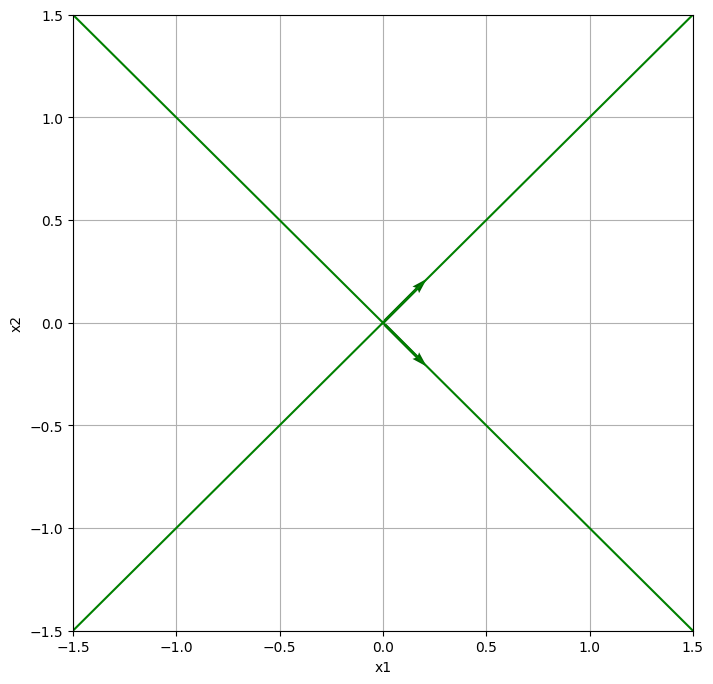

In [7]:
plt.figure(figsize=(figsize, figsize))
vecteurs_propres(np.array([[1, -2], [-2, 1]]))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

plt.savefig("vecteurs_propres.jpg", dpi=200, bbox_inches='tight')
plt.show()

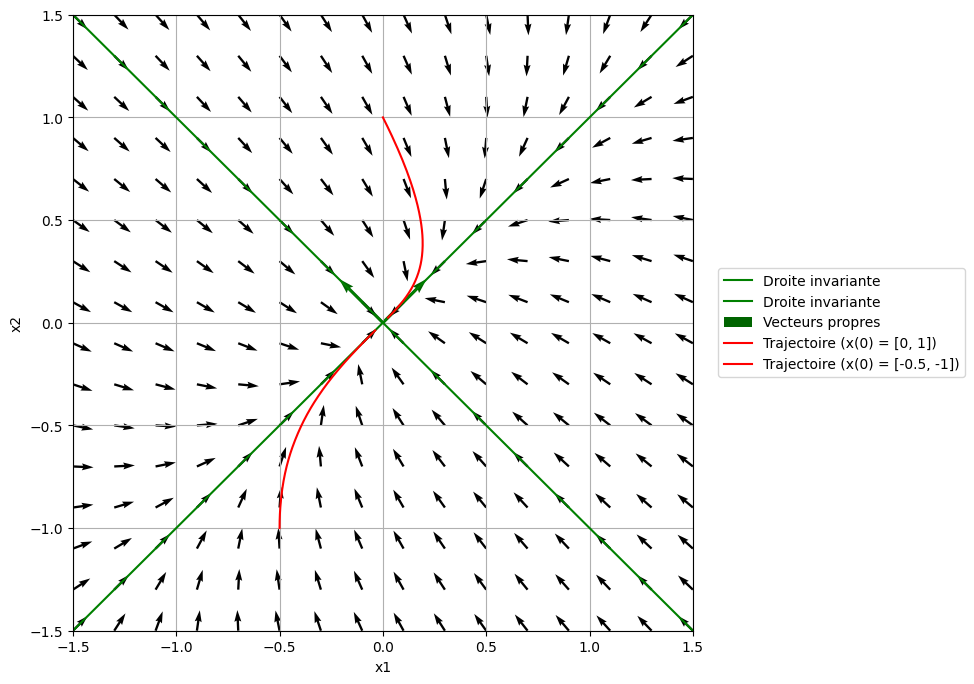

In [8]:
A = np.array([[-2, 1], [1, -2]])
plt.figure(figsize=(figsize, figsize))
vecteurs_propres(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_1.jpg", dpi=200, bbox_inches='tight')
plt.show()

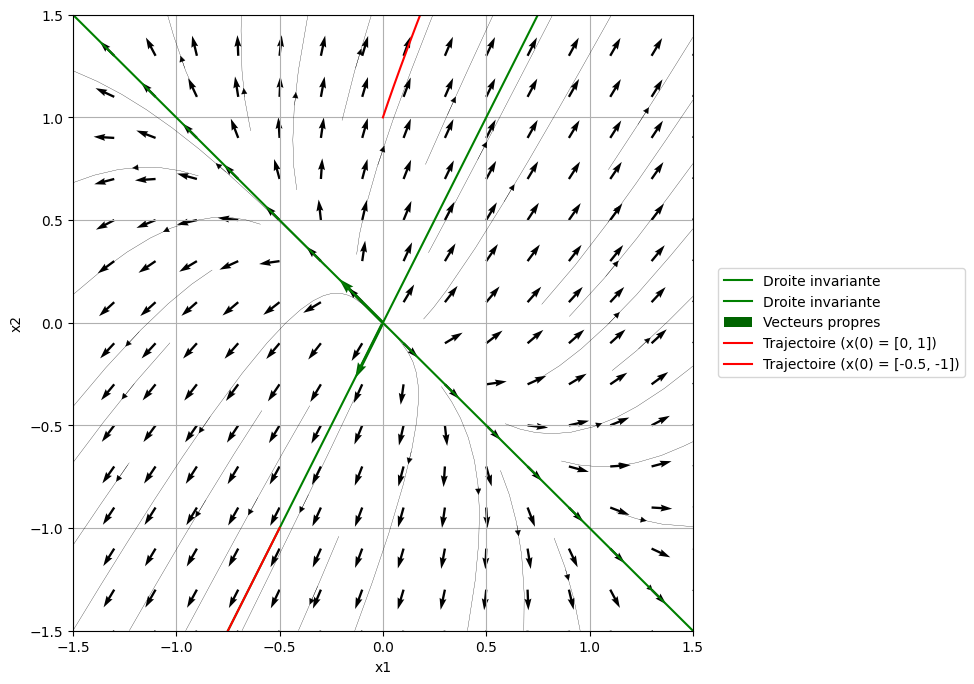

In [9]:
A = np.array([[2, 1], [2, 3]])
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(A)
vecteurs_propres(A)
#isoclines(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_2.jpg", dpi=200, bbox_inches='tight')
plt.show()

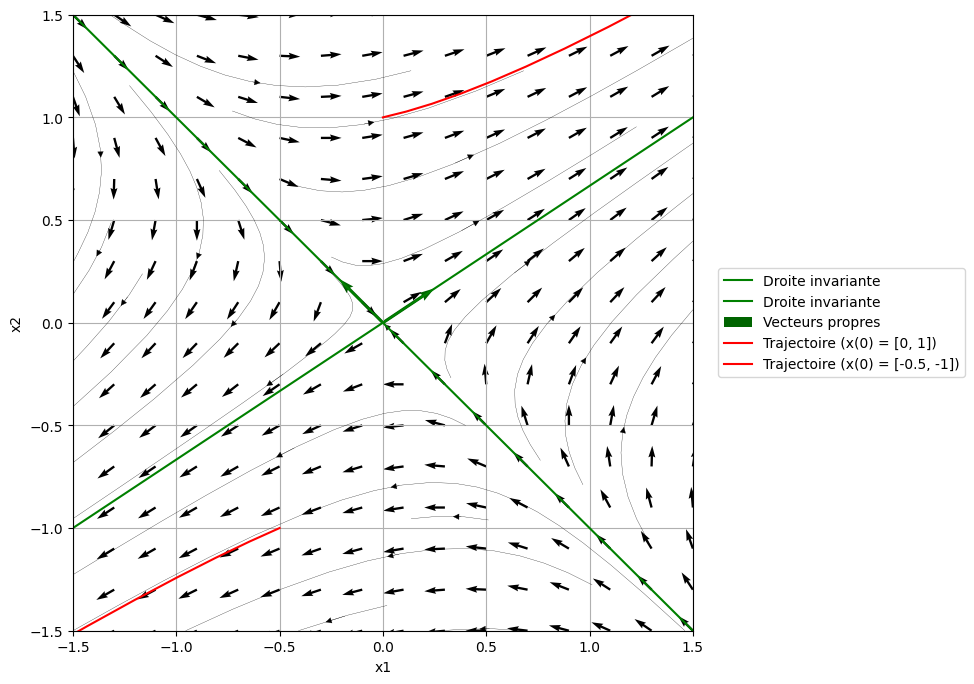

In [10]:
A = np.array([[5, 9], [6, 2]])
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(A)
vecteurs_propres(A)
#isoclines(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_3.jpg", dpi=200, bbox_inches='tight')
plt.show()

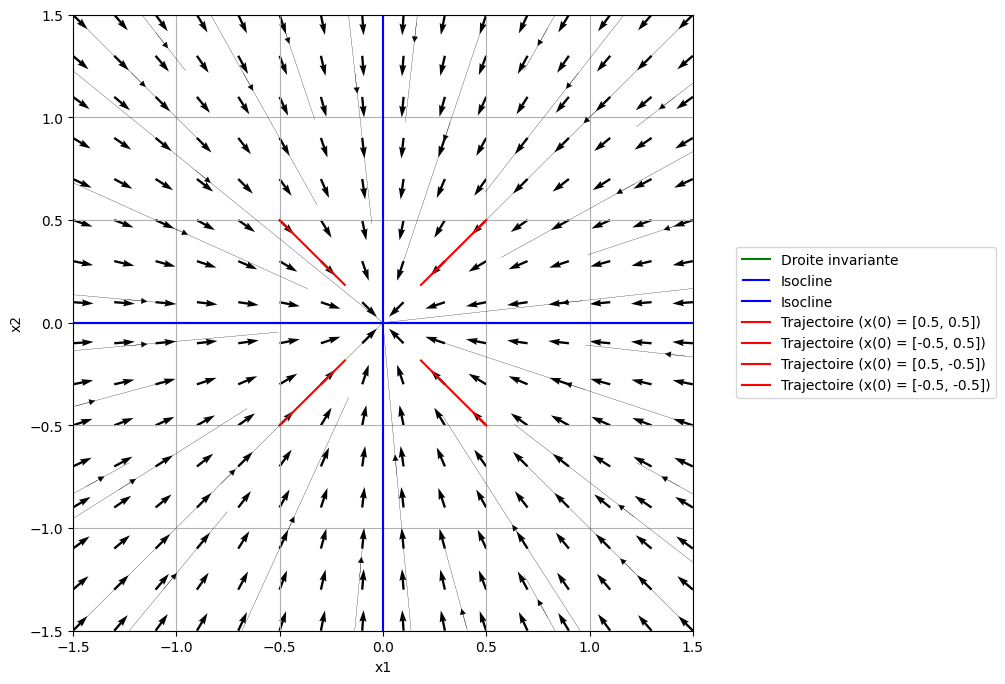

In [11]:
portrait_de_phase(np.array([[-1, 0], [0, -1]]))
plt.savefig("noeud_singulier.jpg", dpi=200, bbox_inches='tight')
plt.show()

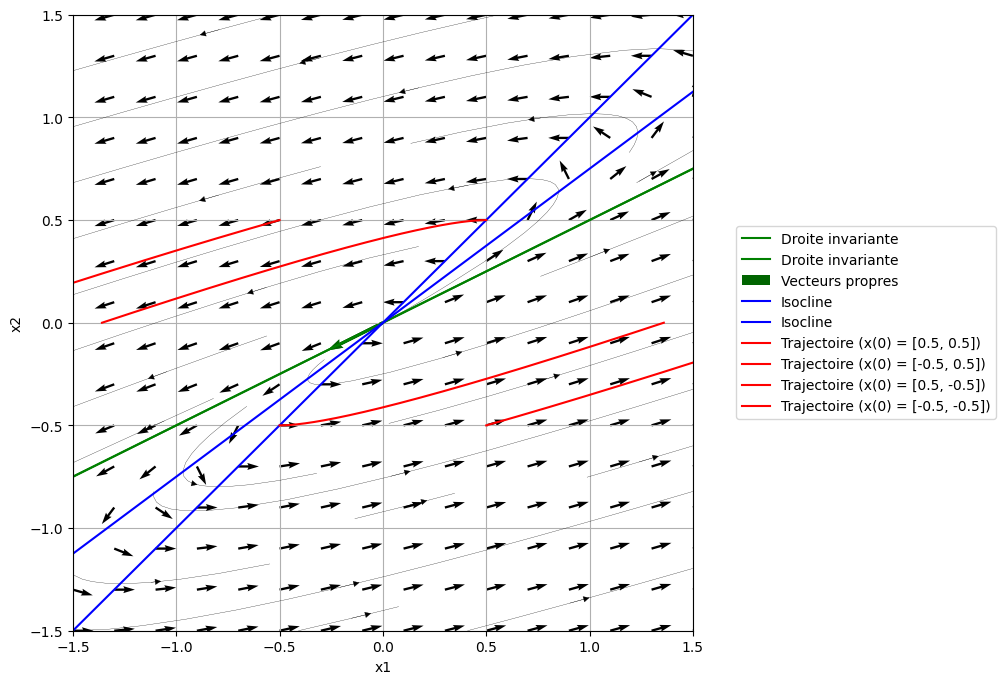

In [12]:
portrait_de_phase(np.array([[3, -4], [1, -1]]))
plt.savefig("noeud_degenere.jpg", dpi=200, bbox_inches='tight')
plt.show()

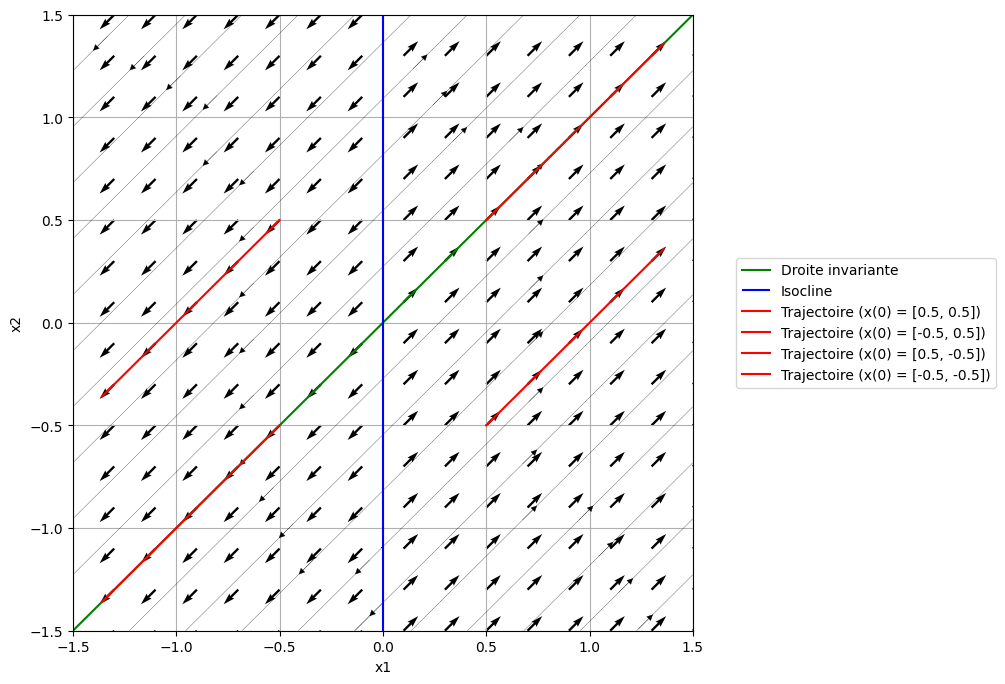

In [13]:
portrait_de_phase(np.array([[1, 0], [1, 0]]))
plt.savefig("mouvement_uniforme.jpg", dpi=200, bbox_inches='tight')
plt.show()

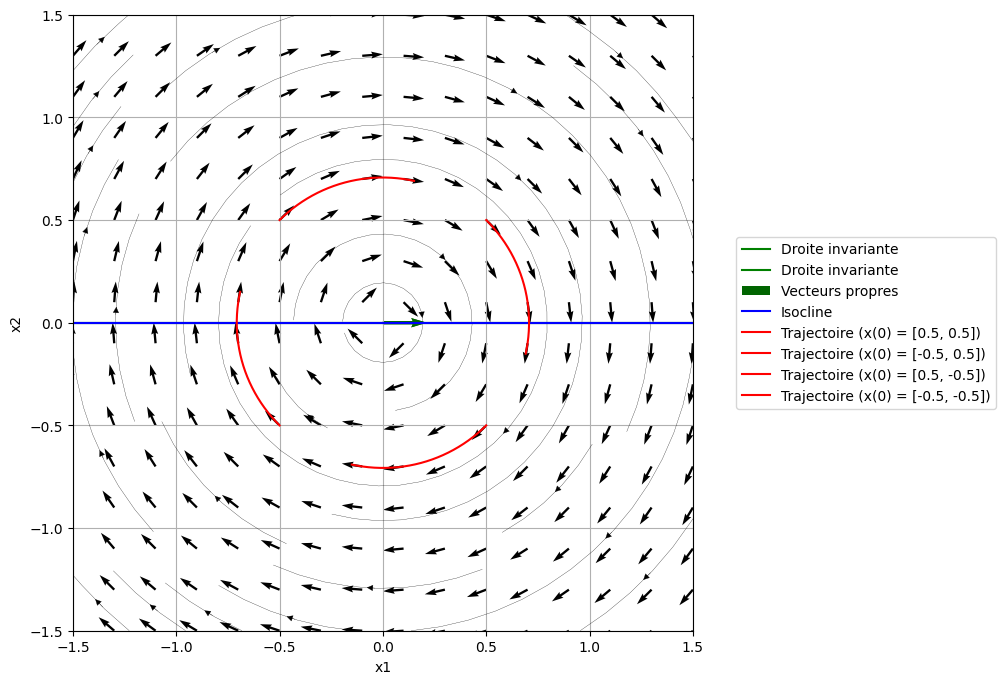

In [14]:
portrait_de_phase(np.array([[0, 1], [-1, 0]]))
plt.savefig("centre.jpg", dpi=200, bbox_inches='tight')
plt.show()

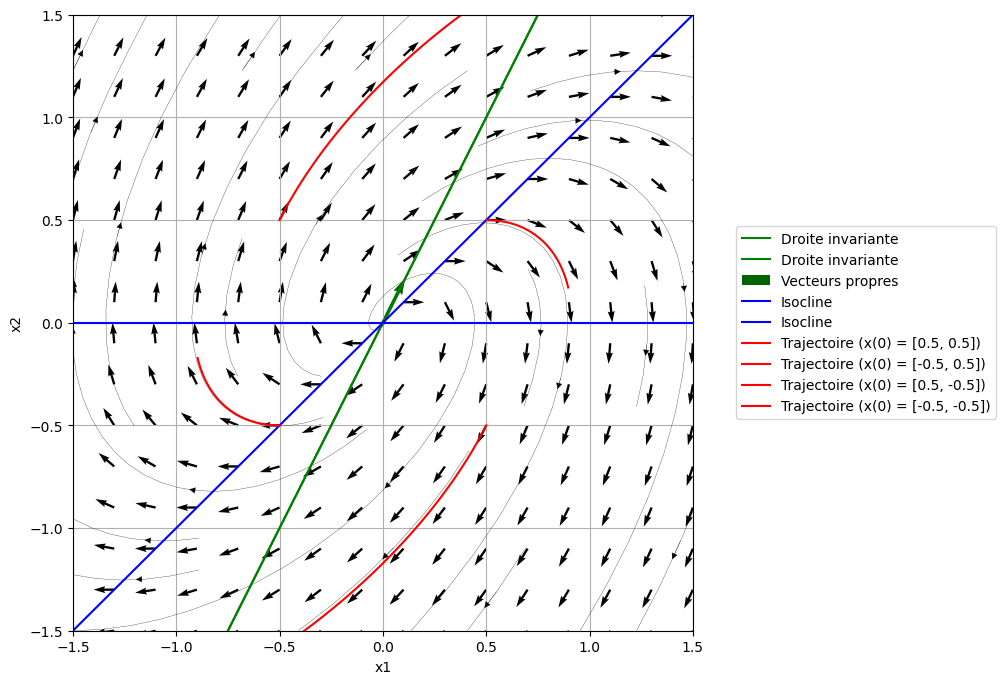

In [15]:
portrait_de_phase(np.array([[0, 1], [-1, 1]]))
plt.savefig("foyer_stable.jpg", dpi=200, bbox_inches='tight')
plt.show()

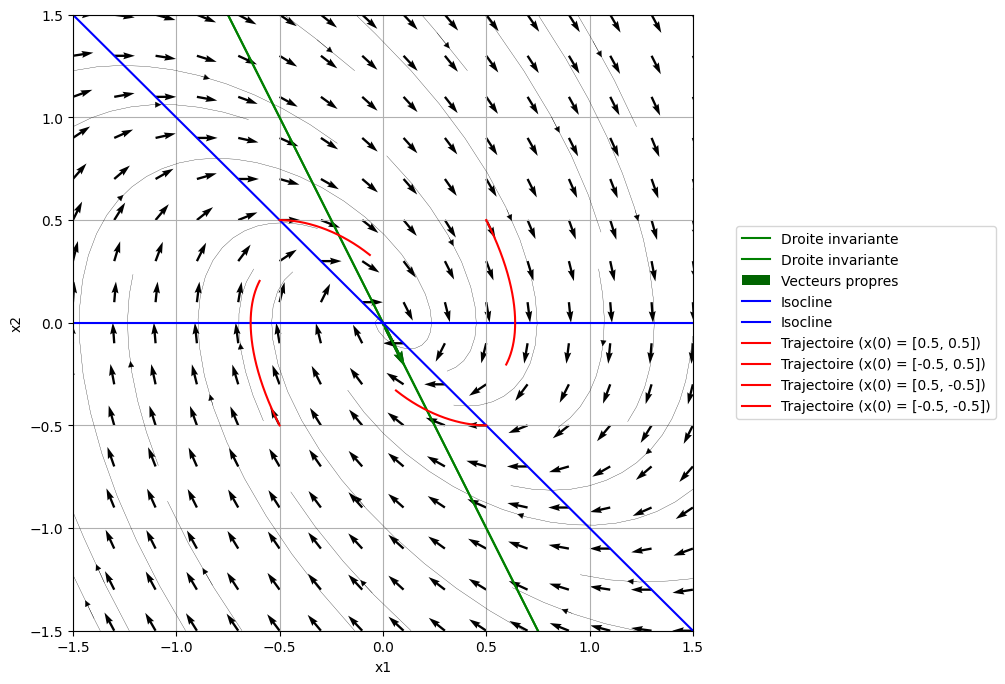

In [16]:
portrait_de_phase(np.array([[0, 1], [-1, -1]]))
plt.savefig("foyer_instable.jpg", dpi=200, bbox_inches='tight')
plt.show()

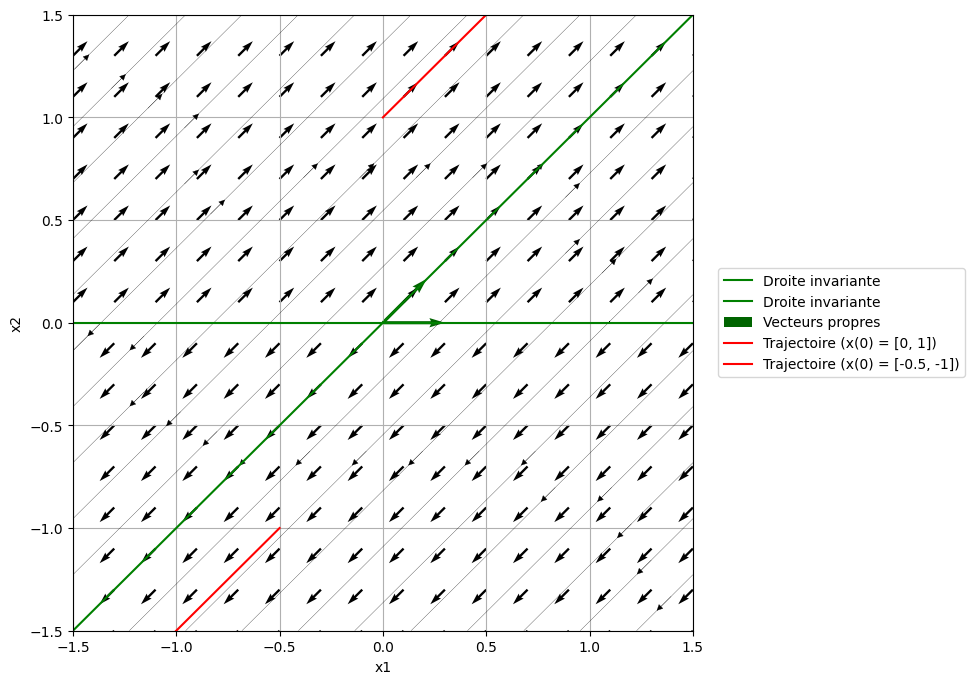

In [17]:
A = np.array([[0, 1], [0, 1]])
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(A)
vecteurs_propres(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_2_1.jpg", dpi=200, bbox_inches='tight')
plt.show()

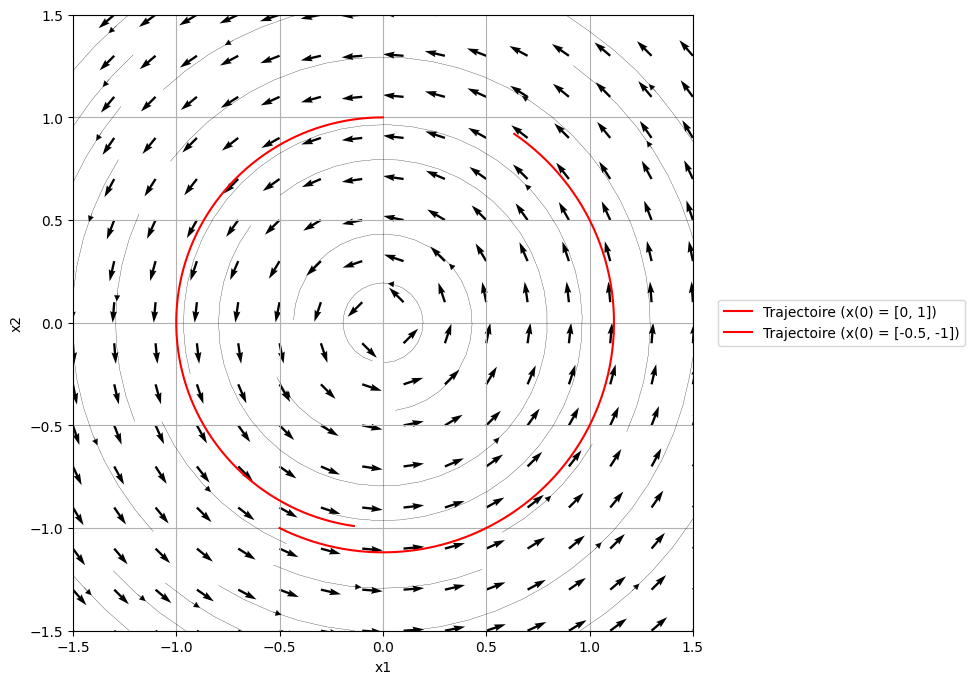

In [18]:
A = np.array([[0, -1], [1, 0]])
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(A)
#vecteurs_propres(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_2_2.jpg", dpi=200, bbox_inches='tight')
plt.show()

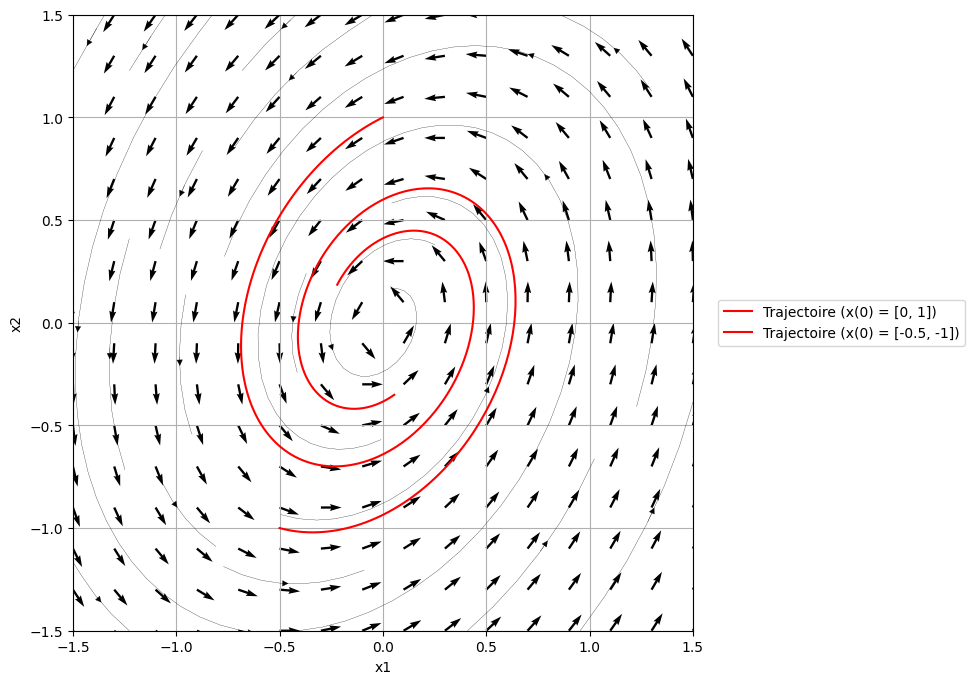

In [19]:
A = np.array([[1/3, -2], [3, -1]])
plt.figure(figsize=(figsize, figsize))
vecteurs_flux(A)
#vecteurs_propres(A)
vecteurs_vitesse(A)
trajectoire(A, [0, 3], [0, 1])
trajectoire(A, [0, 3], [-0.5, -1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("pdp_exercice_2_3.jpg", dpi=200, bbox_inches='tight')
plt.show()

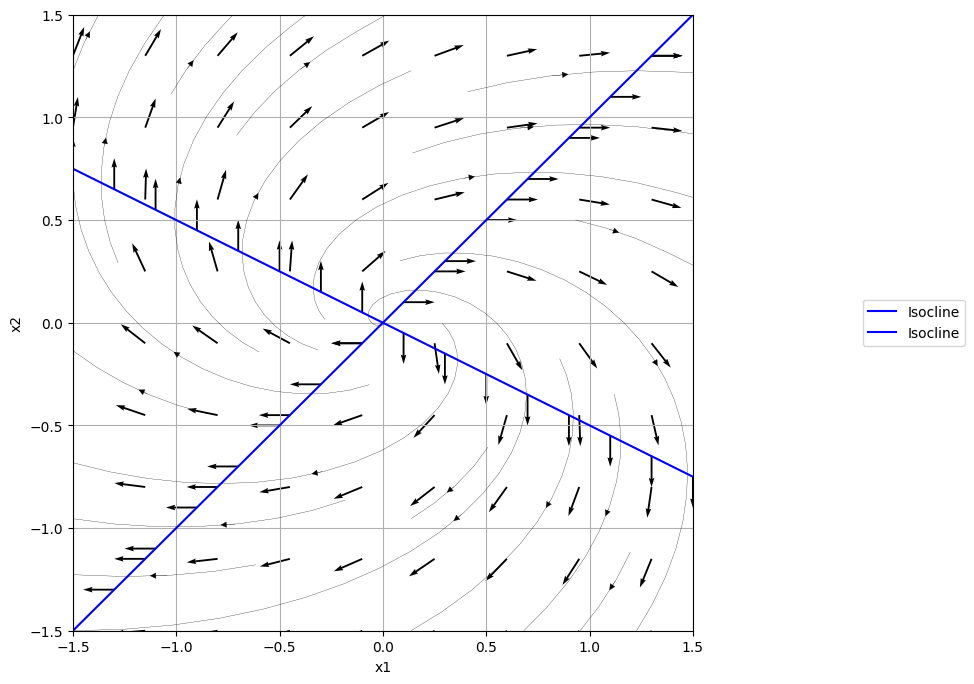

In [20]:
A = np.array([[1, 2], [-1, 1]])

plt.figure(figsize=(figsize, figsize))
x1, x2 = np.meshgrid(np.arange(-1.5, 1.6, 0.35), np.arange(-1.5, 1.6, 0.35))
    
x1_values = A[0,0]*x1 + A[0,1]*x2
x2_values = A[1,0]*x1 + A[1,1]*x2

norms = np.sqrt(x1_values**2 + x2_values**2)
x1_normalized = x1_values / norms
x2_normalized = x2_values / norms
vector_scale = 20
plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale, width=0.003)

x1 = np.arange(-1.5, 1.6, 0.2)
x2 = -(A[0, 0] / A[0, 1]) * x1
x2_2 = -(A[1, 0] / A[1, 1]) * x1

x1_values_1 = A[0,0]*x1 + A[0,1]*x2
x2_values_1 = A[1,0]*x1 + A[1,1]*x2

x1_values_2 = A[0,0]*x1 + A[0,1]*x2_2
x2_values_2 = A[1,0]*x1 + A[1,1]*x2_2

X1, X2 = np.meshgrid(x1, x1)
Y1, Y2 = A[0,0]*X1 + A[0,1]*X2, A[1,0]*X1 + A[1,1]*X2
plt.streamplot(X1, X2, Y1, Y2, density=0.4, linewidth=0.2, color="black")

norms = np.sqrt(x1_values_1**2 + x2_values_1**2)
x1_normalized = x1_values_1 / norms
x2_normalized = x2_values_1 / norms

norms_2 = np.sqrt(x1_values_2**2 + x2_values_2**2)
x1_normalized_2 = x1_values_2 / norms_2
x2_normalized_2 = x2_values_2 / norms_2

vector_scale=20
plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale, width=0.003, color="black")
plt.quiver(x1, x2_2, x1_normalized_2, x2_normalized_2, scale=vector_scale, width=0.003, color="black")

isoclines(A)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)

plt.savefig("isoclines.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [21]:
from scipy.optimize import root_scalar
root_scalar(lambda x: x**2-x+2, x0=0, method='newton')

      converged: False
           flag: convergence error
 function_calls: 100
     iterations: 50
           root: 2.086147325868622
         method: newton

$$\begin{equation}
    \begin{cases}
        x'_1 = x_1 \\
        x'_2 = x_1^2 + x_2^2 - 1
    \end{cases}
\end{equation}$$

/var/folders/g7/l9_hhr256md6lt7yldvmnjjw0000gn/T/ipykernel_53448/500372797.py:33: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.arange(-2.5, 2.5, 0.0001), np.sqrt(1-np.arange(-2.5, 2.5, 0.0001)**2), color='blue')
/var/folders/g7/l9_hhr256md6lt7yldvmnjjw0000gn/T/ipykernel_53448/500372797.py:34: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.arange(-2.5, 2.5, 0.0001), -np.sqrt(1-np.arange(-2.5, 2.5, 0.0001)**2), color='blue', label='Isocline')


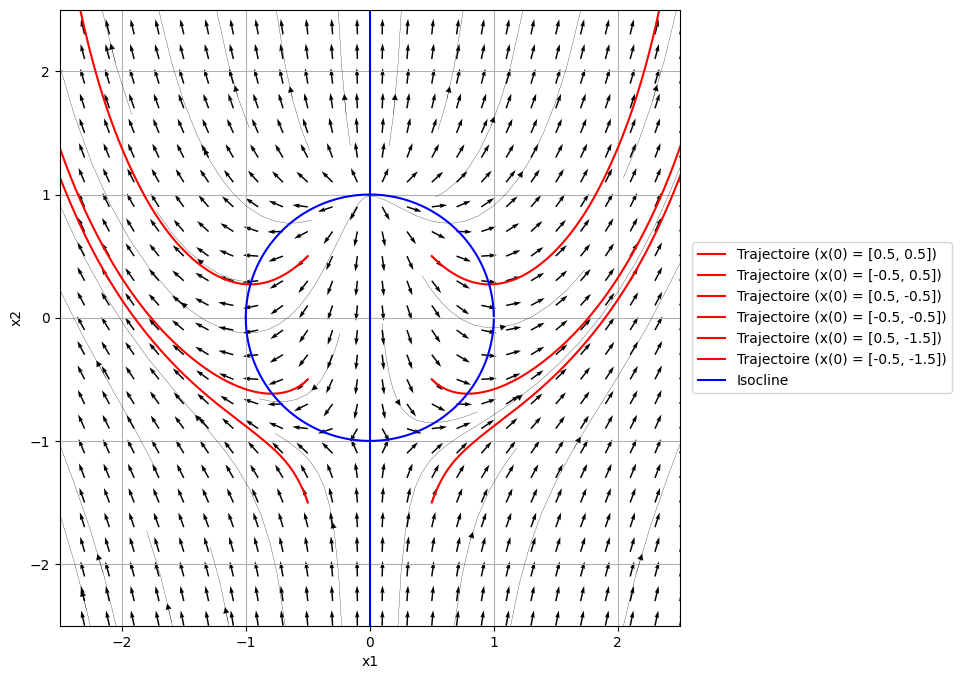

In [22]:
def trajectoire_1(interval, c_i):
    def xdot(t, x):
        return [x[0], x[0]**2 + x[1]**2 - 1]

    sol = solve_ivp(xdot, interval, c_i, t_eval=np.linspace(interval[0], interval[1], 250))
    plt.plot(sol.y[0, :], sol.y[1, :], color='red', label=f"Trajectoire (x(0) = {c_i})")
    
def vecteurs_vitesse_1():
    x1, x2 = np.meshgrid(np.arange(-2.5, 2.6, 0.2), np.arange(-2.5, 2.6, 0.2))
    
    x1_values = x1 
    x2_values = x1**2+x2**2-1
    plt.streamplot(x1, x2, x1_values, x2_values, density=0.4, linewidth=0.2, color="black")
    
    norms = np.sqrt(x1_values**2 + x2_values**2)
    x1_normalized = x1_values / norms
    x2_normalized = x2_values / norms
    
    vector_scale = 40
    plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale)

def exercice_3_1():
    plt.figure(figsize=(figsize, figsize))
    #vecteurs_propres(A)
    #isoclines(A)
    vecteurs_vitesse_1()
    trajectoire_1([0, 4], [0.5, 0.5])
    trajectoire_1([0, 4], [-0.5, 0.5])
    trajectoire_1([0, 4], [0.5, -0.5])
    trajectoire_1([0, 4], [-0.5, -0.5])
    trajectoire_1([0, 4], [0.5, -1.5])
    trajectoire_1([0, 4], [-0.5, -1.5])
    plt.plot(np.arange(-2.5, 2.5, 0.0001), np.sqrt(1-np.arange(-2.5, 2.5, 0.0001)**2), color='blue')
    plt.plot(np.arange(-2.5, 2.5, 0.0001), -np.sqrt(1-np.arange(-2.5, 2.5, 0.0001)**2), color='blue', label='Isocline')
    plt.vlines(x=0, ymin=-2.5, ymax=2.5, color='blue')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)
    

exercice_3_1()
plt.savefig('pdp_exercice_3_1.jpg', dpi=200, bbox_inches='tight')
plt.show()

$$\begin{equation}
                \begin{cases}
                    x'_1 = x_2 \\
                    x'_2 = x_1(1 - x_1^2) + x_2
                \end{cases}
            \end{equation}$$

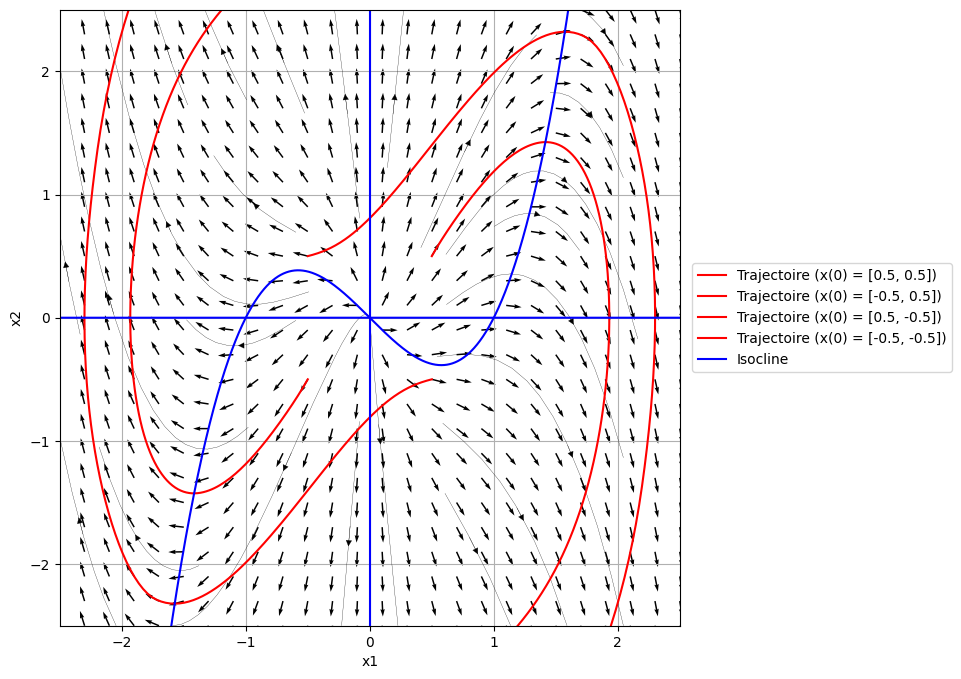

In [23]:
def trajectoire_2(interval, c_i):
    def xdot(t, x):
        return [x[1], x[0]*(1-x[0]**2) + x[1]]

    sol = solve_ivp(xdot, interval, c_i, t_eval=np.linspace(interval[0], interval[1], 250))
    plt.plot(sol.y[0, :], sol.y[1, :], color='red', label=f"Trajectoire (x(0) = {c_i})")
    
def vecteurs_vitesse_2():
    x1, x2 = np.meshgrid(np.arange(-2.5, 2.6, 0.2), np.arange(-2.5, 2.6, 0.2))
    
    x1_values = x1 
    x2_values = x1*(1-x1**2)+x2
    
    plt.streamplot(x1, x2, x1_values, x2_values, density=0.4, linewidth=0.2, color="black")
    
    norms = np.sqrt(x1_values**2 + x2_values**2)
    x1_normalized = x1_values / norms
    x2_normalized = x2_values / norms
    
    vector_scale = 40
    plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale)

def exercice_3_2():
    plt.figure(figsize=(figsize, figsize))
    #vecteurs_propres(A)
    #isoclines(A)
    vecteurs_vitesse_2()
    trajectoire_2([0, 4], [0.5, 0.5])
    trajectoire_2([0, 4], [-0.5, 0.5])
    trajectoire_2([0, 4], [0.5, -0.5])
    trajectoire_2([0, 4], [-0.5, -0.5])
    plt.plot(np.arange(-2.5, 2.5, 0.0001), np.arange(-2.5, 2.5, 0.0001)*(np.arange(-2.5, 2.5, 0.0001)**2 -1), color='blue')
    plt.plot(np.arange(-2.5, 2.5, 0.0001), 0*np.arange(-2.5, 2.5, 0.0001), color='blue', label='Isocline')
    plt.vlines(x=0, ymin=-2.5, ymax=2.5, color='blue')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)
    

exercice_3_2()
plt.savefig('pdp_exercice_3_2.jpg', dpi=200, bbox_inches='tight')
plt.show()

$$\begin{equation}
                \begin{cases}
                    x'_1 = 0.2 x_1 - 0.08 x_1 x_2 \\
                    x'_2 = 0.1 x_1 x_2 - 0.2 x_2
                \end{cases}
            \end{equation}$$

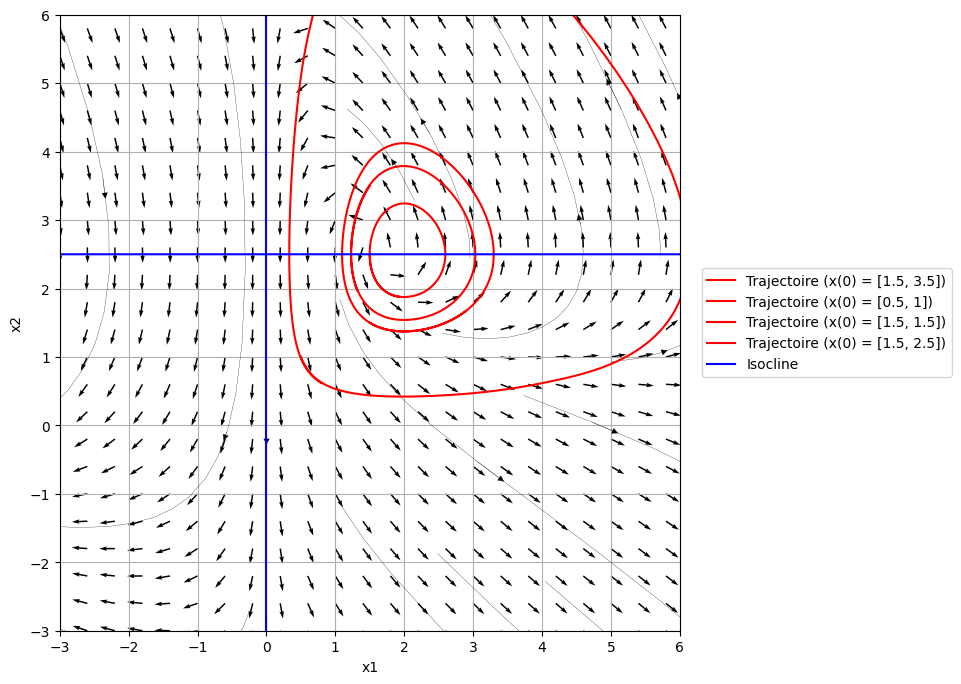

In [24]:
def trajectoire_3(interval, c_i):
    def xdot(t, x):
        return [0.2*x[0] - 0.08*x[0]*x[1], 0.1*x[0]*x[1] - 0.2*x[1]]

    sol = solve_ivp(xdot, interval, c_i, t_eval=np.linspace(interval[0], interval[1], 250))
    plt.plot(sol.y[0, :], sol.y[1, :], color='red', label=f"Trajectoire (x(0) = {c_i})")
    
def vecteurs_vitesse_3():
    x1, x2 = np.meshgrid(np.arange(-7, 7, 0.4), np.arange(-7, 7, 0.4))
    
    x1_values = 0.2*x1 - 0.08*x1*x2
    x2_values = 0.1*x1*x2 - 0.2*2

    plt.streamplot(x1, x2, x1_values, x2_values, density=0.4, linewidth=0.2, color="black")
    
    norms = np.sqrt(x1_values**2 + x2_values**2)
    x1_normalized = x1_values / norms
    x2_normalized = x2_values / norms
    
    vector_scale = 40
    plt.quiver(x1, x2, x1_normalized, x2_normalized, scale=vector_scale)

def exercice_3_3():
    plt.figure(figsize=(figsize, figsize))
    #vecteurs_propres(A)
    #isoclines(A)
    vecteurs_vitesse_3()
    trajectoire_3([0, 40], [1.5, 3.5])
    trajectoire_3([0, 40], [0.5, 1])
    trajectoire_3([0, 40], [1.5, 1.5])
    trajectoire_3([0, 40], [1.5, 2.5])
    plt.plot(np.arange(-7, 7, 0.0001), 0*np.arange(-7, 7, 0.0001)+2.5, color='blue', label='Isocline')
    plt.vlines(x=0, ymin=-7, ymax=7, color='blue')
    plt.xlim([-3, 6])
    plt.ylim([-3, 6])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), fancybox=True)
    

exercice_3_3()
plt.savefig('pdp_exercice_3_3.jpg', dpi=200, bbox_inches='tight')
plt.show()

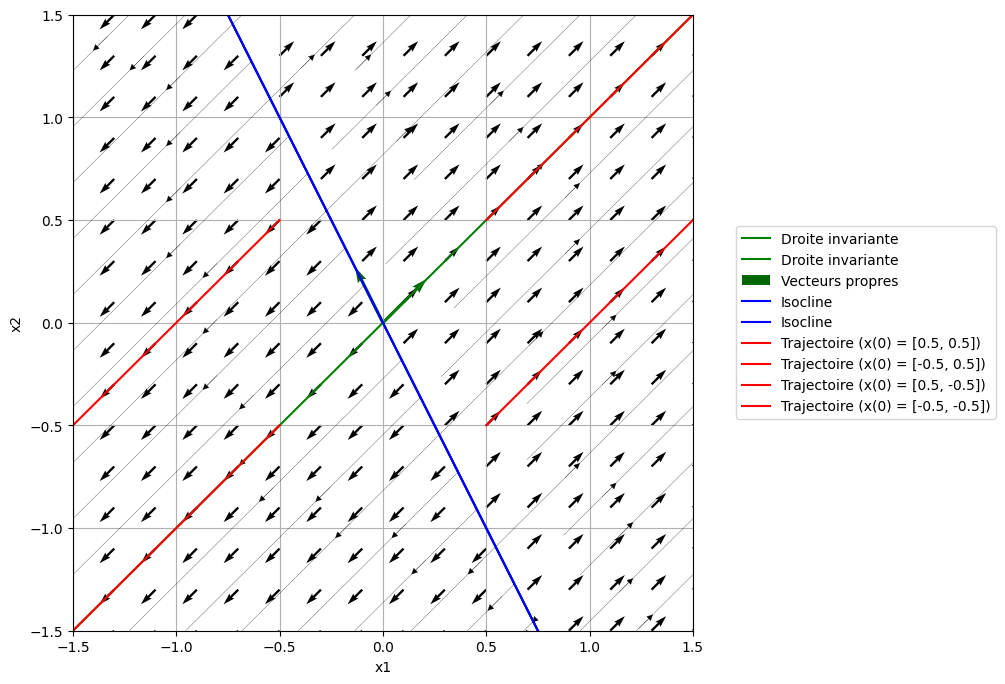

In [25]:
portrait_de_phase(np.array([[2, 1], [2, 1]]))
plt.savefig("conclusif_1.jpg", dpi=200, bbox_inches='tight')
plt.show()

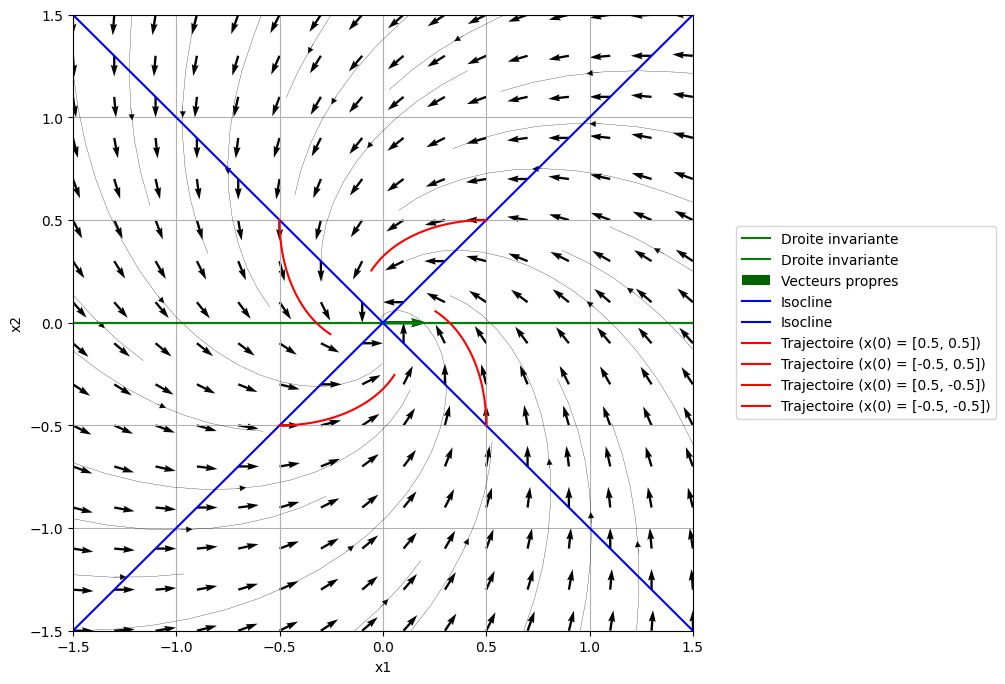

In [26]:
portrait_de_phase(np.array([[-1, -1], [1, -1]]))
plt.savefig("conclusif_2.jpg", dpi=200, bbox_inches='tight')
plt.show()

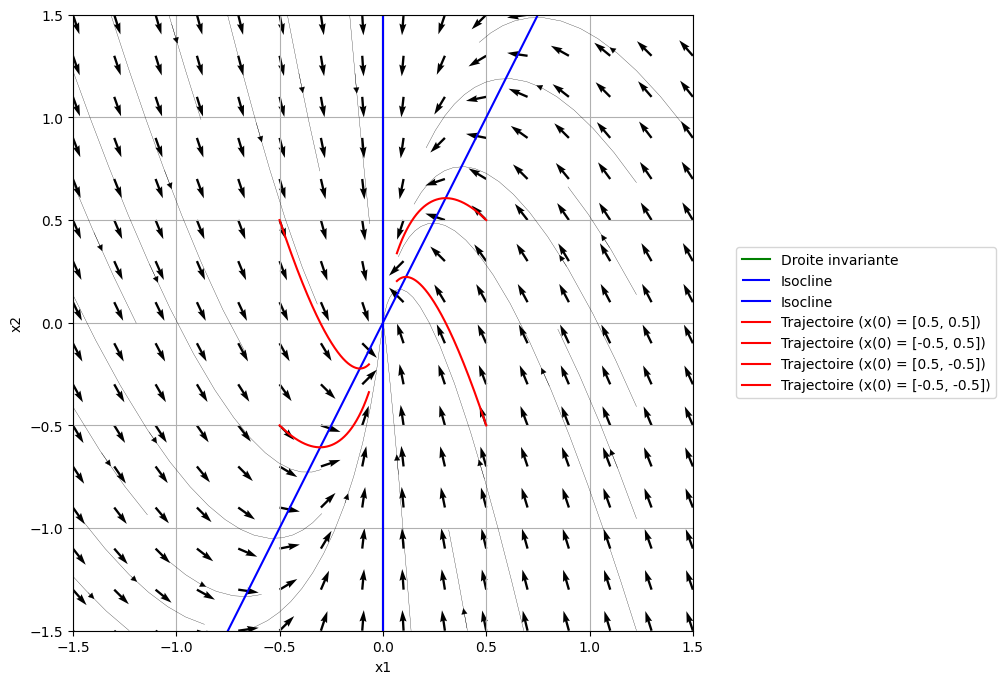

In [27]:
portrait_de_phase(np.array([[-2, 0], [4, -2]]))
plt.savefig("conclusif_3.jpg", dpi=200, bbox_inches='tight')
plt.show()